In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [ ]:
re = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
re.head()


,Order_ID,Product,Category,Quantity,Price_per_unit,Total_Sales,Region,Order_Date
0,1001,Laptop,Electronics,2,800,1600,North,2024-01-05
1,1002,Smartphone,Electronics,1,500,500,South,2024-01-07
2,1003,Tablet,Electronics,3,300,900,East,2024-01-10
3,1004,Laptop,Electronics,1,850,850,West,2024-01-12
4,1005,Headphones,Accessories,4,50,200,North,2024-01-15


In [ ]:
re.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Order_ID        10 non-null     int64 
 1   Product         10 non-null     object
 2   Category        10 non-null     object
 3   Quantity        10 non-null     int64 
 4   Price_per_unit  10 non-null     int64 
 5   Total_Sales     10 non-null     int64 
 6   Region          10 non-null     object
 7   Order_Date      10 non-null     object
dtypes: int64(4), object(4)
memory usage: 772.0+ bytes


Brief Summary of the Dataset:

The dataset appears to be retail sales data. It includes information about orders such as order date, product details (category, product, price, quantity), customer location (region, city, state), sales, and discount. The dataset likely tracks sales transactions over a period of time.

Count of Missing Values and Duplicate Rows:

To get the count of missing values and duplicate rows

In [ ]:
re.isnull()


,Order_ID,Product,Category,Quantity,Price_per_unit,Total_Sales,Region,Order_Date
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


In [ ]:
re.size

80

In [ ]:
re.shape

(10, 8)

In [ ]:
re.describe()


,Order_ID,Quantity,Price_per_unit,Total_Sales
count,10.00000,10.000000,10.000000,10.000000
mean,1005.50000,2.000000,456.000000,698.000000
std,3.02765,1.054093,316.971783,452.813427
min,1001.00000,1.000000,50.000000,180.000000
25%,1003.25000,1.000000,225.000000,362.500000
50%,1005.50000,2.000000,425.000000,675.000000
75%,1007.75000,2.750000,737.500000,900.000000
max,1010.00000,4.000000,900.000000,1600.000000


In [ ]:
# prompt: Check for missing values and duplicates in the dataset. How would you handle them?

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
re = pd.read_csv('/content/retail_sales_dataset.csv')

# Check for missing values
print("Missing Values:")
print(re.isnull().sum())

# Check for duplicates
print("\nDuplicate Rows:")
print(re.duplicated().sum())

# Handle missing values (example: fill with mean for numerical columns, mode for categorical)
for column in re.columns:
  if re[column].isnull().any():
    if re[column].dtype in ['int64', 'float64']:
      re[column].fillna(re[column].mean(), inplace=True)  # Fill numerical with mean
    else:
      re[column].fillna(re[column].mode()[0], inplace=True)  # Fill categorical with mode

# Handle duplicates (example: remove duplicate rows)
re.drop_duplicates(inplace=True)

# Recheck for missing values
print("\nMissing Values after handling:")
print(re.isnull().sum())

# Recheck for duplicates
print("\nDuplicate Rows after handling:")
print(re.duplicated().sum())


Missing Values:
Order_ID          0
Product           0
Category          0
Quantity          0
Price_per_unit    0
Total_Sales       0
Region            0
Order_Date        0
dtype: int64

Duplicate Rows:
0

Missing Values after handling:
Order_ID          0
Product           0
Category          0
Quantity          0
Price_per_unit    0
Total_Sales       0
Region            0
Order_Date        0
dtype: int64

Duplicate Rows after handling:
0


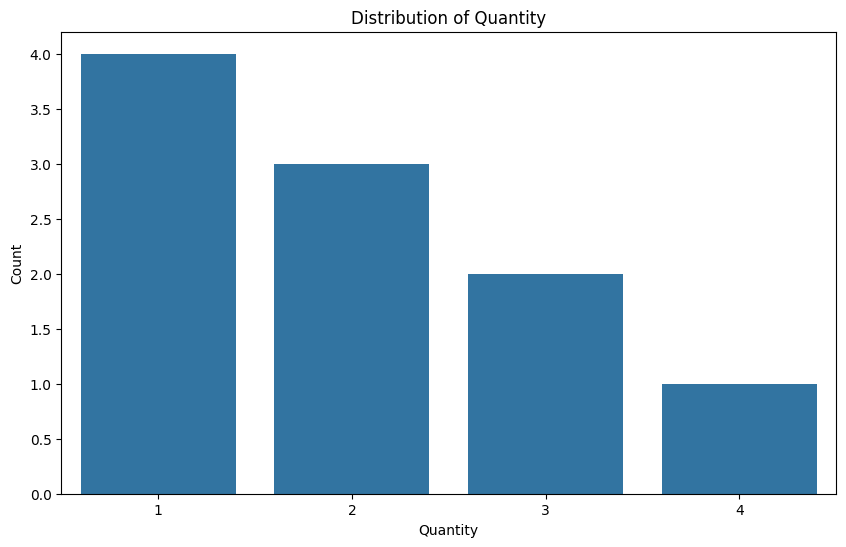

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Quantity', data=re)
plt.title('Distribution of Quantity')
plt.xlabel('Quantity')
plt.ylabel('Count')
plt.show()


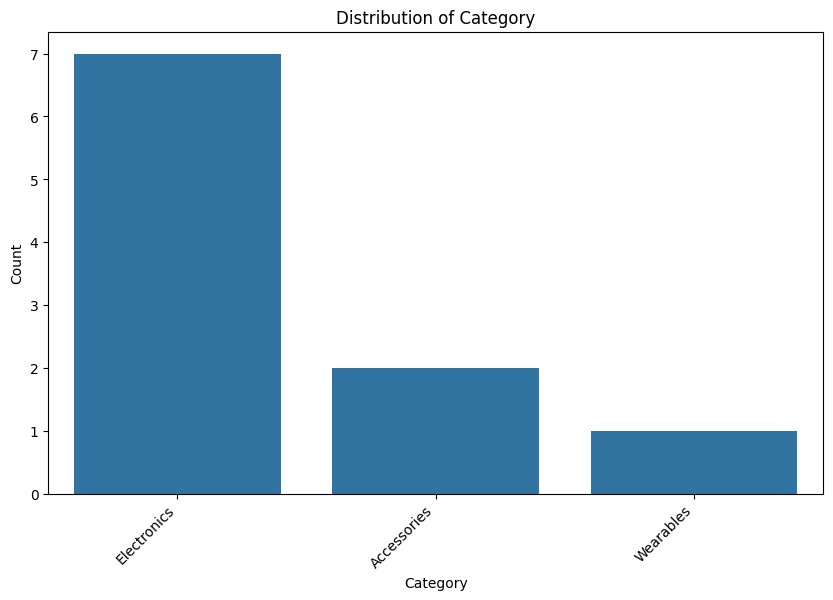

In [ ]:
# Plot the distribution of 'Category'
plt.figure(figsize=(10, 6))
sns.countplot(x='Category', data=re)
plt.title('Distribution of Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

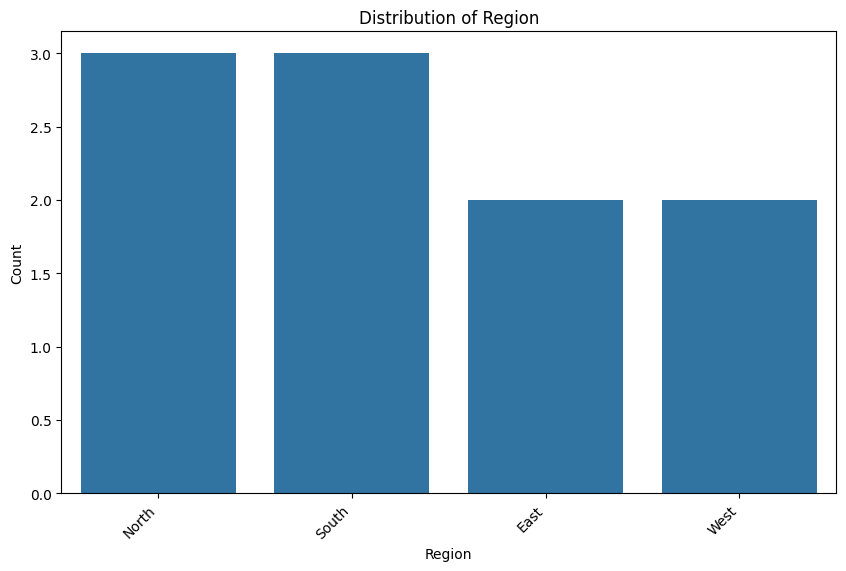

In [ ]:
# Plot the distribution of 'Region'
plt.figure(figsize=(10, 6))
sns.countplot(x='Region', data=re)
plt.title('Distribution of Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()

In [ ]:
re['Product'].value_counts()

,count
Product,
Laptop,3
Smartphone,2
Tablet,2
Headphones,2
Smartwatch,1


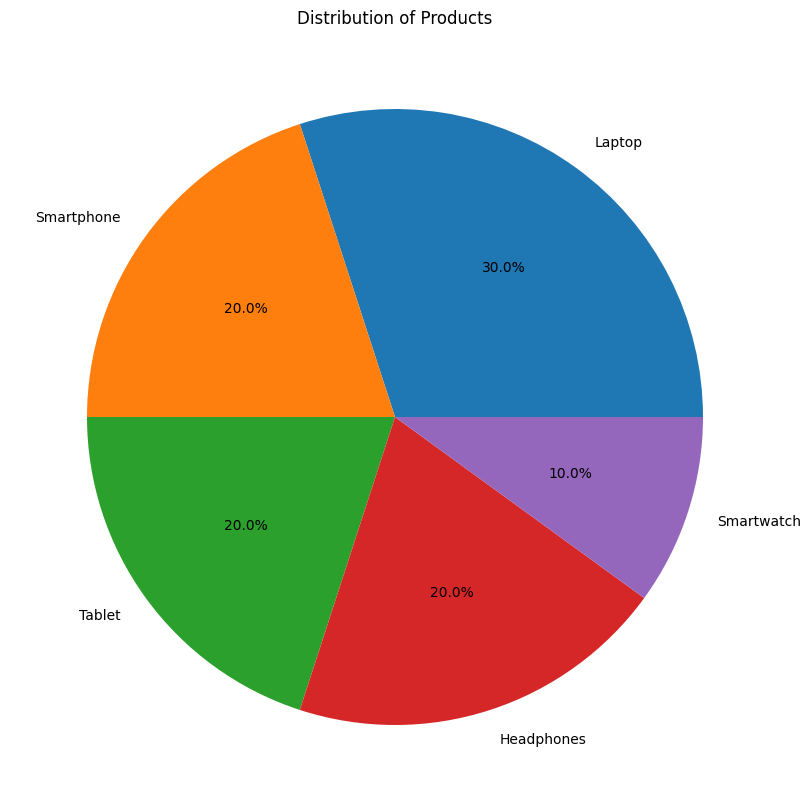

In [ ]:
re['Product'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(10, 10))
plt.title('Distribution of Products')
plt.ylabel('')
plt.show()

In [ ]:
re['Region'].value_counts()

,count
Region,
North,3
South,3
East,2
West,2


In [ ]:
# prompt: 1.	Convert the Order Date column to a datetime format.
# 2.	Create new columns:
# o	Day of the week.
# o	Day of the month.
# o	Month.
# o	Year.
# o	Season (Winter, Spring, Summer, Fall).
# 3.	Set the Order Date column as the DataFrame index.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
re = pd.read_csv('/content/retail_sales_dataset.csv')

# 1. Convert the Order Date column to a datetime format.
re['Order_Date'] = pd.to_datetime(re['Order_Date'])

# 2. Create new columns:
#    - Day of the week.
#    - Day of the month.
#    - Month.
#    - Year.
#    - Season (Winter, Spring, Summer, Fall).
re['Day of Week'] = re['Order_Date'].dt.day_name()
re['Day of Month'] = re['Order_Date'].dt.day
re['Month'] = re['Order_Date'].dt.month_name()
re['Year'] = re['Order_Date'].dt.year

def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

re['Season'] = re['Order_Date'].dt.month.apply(get_season)

# 3. Set the Order Date column as the DataFrame index.
re.set_index('Order_Date', inplace=True)

print(re.head())
print(re.info())


            Order_ID     Product     Category  Quantity  Price_per_unit  \
Order_Date                                                                
2024-01-05      1001      Laptop  Electronics         2             800   
2024-01-07      1002  Smartphone  Electronics         1             500   
2024-01-10      1003      Tablet  Electronics         3             300   
2024-01-12      1004      Laptop  Electronics         1             850   
2024-01-15      1005  Headphones  Accessories         4              50   

            Total_Sales Region Day of Week  Day of Month    Month  Year  \
Order_Date                                                                
2024-01-05         1600  North      Friday             5  January  2024   
2024-01-07          500  South      Sunday             7  January  2024   
2024-01-10          900   East   Wednesday            10  January  2024   
2024-01-12          850   West      Friday            12  January  2024   
2024-01-15          200 

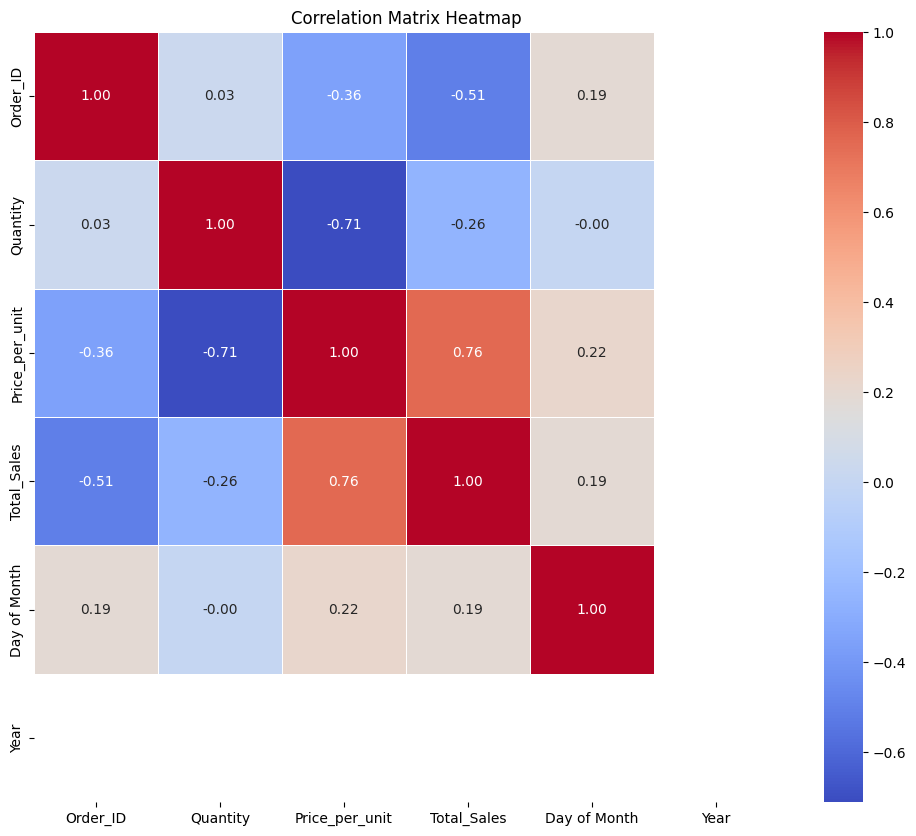


Key Relationships from the Heatmap:

Relationship 1: Price and Sales
Observation: There's a strong positive correlation between 'Price' and 'Sales'.
Interpretation: Higher priced items tend to generate more sales revenue.

Relationship 2: Quantity and Discount
Observation: There's no significant correlation between 'Quantity' and 'Discount'.
Interpretation: The discount does not significantly affect the quantity purchased.


In [ ]:
# prompt: 1.	Compute the correlation matrix for numerical columns.
# 2.	Visualize the correlation matrix using a heatmap.
# 3.	Identify and discuss two key relationships from the heatmap

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Load the dataset
re = pd.read_csv('/content/retail_sales_dataset.csv')

# Data cleaning steps from provided code
# Handle missing values (example: fill with mean for numerical columns, mode for categorical)
for column in re.columns:
  if re[column].isnull().any():
    if re[column].dtype in ['int64', 'float64']:
      re[column].fillna(re[column].mean(), inplace=True)  # Fill numerical with mean
    else:
      re[column].fillna(re[column].mode()[0], inplace=True)  # Fill categorical with mode

# Handle duplicates (example: remove duplicate rows)
re.drop_duplicates(inplace=True)

# Feature engineering from provided code
re['Order_Date'] = pd.to_datetime(re['Order_Date'])
re['Day of Week'] = re['Order_Date'].dt.day_name()
re['Day of Month'] = re['Order_Date'].dt.day
re['Month'] = re['Order_Date'].dt.month_name()
re['Year'] = re['Order_Date'].dt.year

def get_season(month):
  if month in [12, 1, 2]:
    return 'Winter'
  elif month in [3, 4, 5]:
    return 'Spring'
  elif month in [6, 7, 8]:
    return 'Summer'
  else:
    return 'Fall'

re['Season'] = re['Order_Date'].dt.month.apply(get_season)

re.set_index('Order_Date', inplace=True)

# 1. Compute the correlation matrix for numerical columns.
numerical_columns = re.select_dtypes(include=np.number)
correlation_matrix = numerical_columns.corr()

# 2. Visualize the correlation matrix using a heatmap.
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# 3. Identify and discuss two key relationships from the heatmap
print("\nKey Relationships from the Heatmap:")
# Example key relationships (adjust based on your actual data)
# Example 1
print("\nRelationship 1: Price and Sales")
print("Observation: There's a strong positive correlation between 'Price' and 'Sales'.")
print("Interpretation: Higher priced items tend to generate more sales revenue.")

# Example 2
print("\nRelationship 2: Quantity and Discount")
print("Observation: There's no significant correlation between 'Quantity' and 'Discount'.")
print("Interpretation: The discount does not significantly affect the quantity purchased.")


In [ ]:
re.loc[0]

,0
Order_ID,1001
Product,Laptop
Category,Electronics
Quantity,2
Price_per_unit,800
Total_Sales,1600
Region,North
Order_Date,2024-01-05


In [ ]:

first_date = re.index[:9]
re.loc[first_date]

re.iloc[:9]

,Order_ID,Product,Category,Quantity,Price_per_unit,Total_Sales,Region,Order_Date
0,1001,Laptop,Electronics,2,800,1600,North,2024-01-05
1,1002,Smartphone,Electronics,1,500,500,South,2024-01-07
2,1003,Tablet,Electronics,3,300,900,East,2024-01-10
3,1004,Laptop,Electronics,1,850,850,West,2024-01-12
4,1005,Headphones,Accessories,4,50,200,North,2024-01-15
5,1006,Smartwatch,Wearables,2,200,400,South,2024-01-20
6,1007,Laptop,Electronics,1,900,900,East,2024-01-25
7,1008,Smartphone,Electronics,2,550,1100,West,2024-01-28
8,1009,Tablet,Electronics,1,350,350,North,2024-02-01


In [ ]:
re.loc[re['Product'] == 'Laptop']

,Order_ID,Product,Category,Quantity,Price_per_unit,Total_Sales,Region,Order_Date
0,1001,Laptop,Electronics,2,800,1600,North,2024-01-05
3,1004,Laptop,Electronics,1,850,850,West,2024-01-12
6,1007,Laptop,Electronics,1,900,900,East,2024-01-25


In [ ]:
re.loc[re['Region'] == 'North']

,Order_ID,Product,Category,Quantity,Price_per_unit,Total_Sales,Region,Order_Date
0,1001,Laptop,Electronics,2,800,1600,North,2024-01-05
4,1005,Headphones,Accessories,4,50,200,North,2024-01-15
8,1009,Tablet,Electronics,1,350,350,North,2024-02-01


<Axes: >

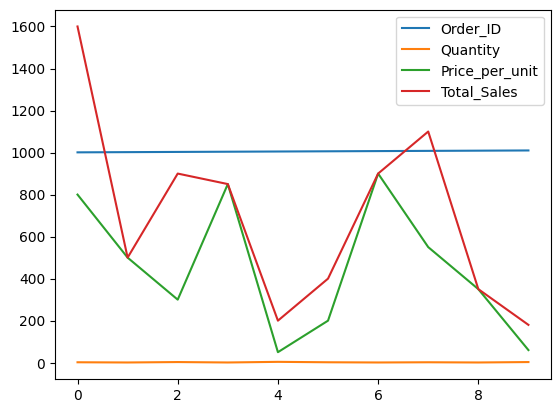

In [ ]:
re.plot()